Essa aula começa com uma cópia da aula 3

In [57]:
import cv2 # 4.2.0 REMEMBER TO: pip install opencv-contrib-python
import matplotlib.pyplot as plt

from os import listdir, path, makedirs
from os.path import isfile, join

import shutil

import numpy as np

from sklearn.metrics import accuracy_score

## Verificando imagens

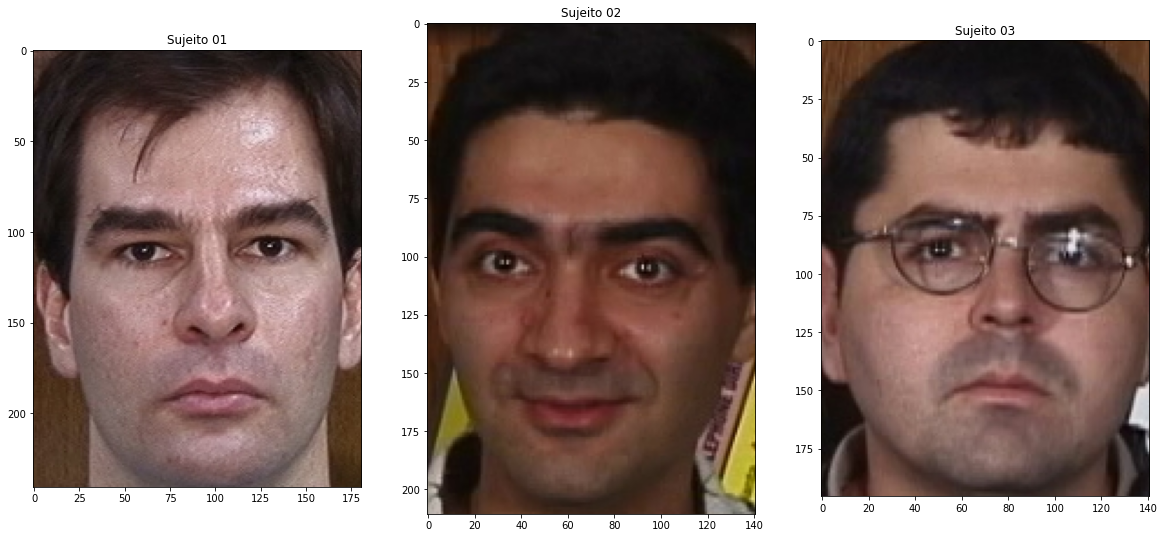

In [2]:
imagem_face_1 = cv2.imread("images/cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("images/cropped_faces/s02_01.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("images/cropped_faces/s03_01.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1)
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2)
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3)

plt.show()

In [3]:
imagem_face_1.shape

(241, 181, 3)

In [4]:
imagem_face_2.shape

(211, 141, 3)

In [5]:
imagem_face_3.shape

(196, 141, 3)

#### Agora vamos pegar as imagens da pasta cropped faces para separar em teste e treino

In [6]:
faces_caminho = "images/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [7]:
lista_arq_faces[0]

's36_10.jpg'

In [8]:
len(lista_arq_faces)

750

In [9]:
faces_path_treino = "images/treino/"
faces_path_teste = "images/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3] # s(23)_06.jpg
    numero = arq[4:6] # s23_(06).jpg
    
    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [10]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [11]:
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [12]:
lista_faces_treino[0]

's36_10.jpg'

In [13]:
lista_faces_teste[0]

's18_13.jpg'

In [14]:
dados_treinamento, sujeitos = [], []

In [15]:
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [16]:
len(dados_treinamento)

500

In [17]:
len(sujeitos)

500

In [18]:
dados_teste, sujeitos_teste = [], [] 

In [19]:
for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [20]:
len(dados_teste)

250

In [21]:
len(sujeitos_teste)

250

Text(0.5, 1.0, '1')

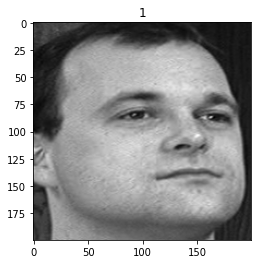

In [22]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

Text(0.5, 1.0, '18')

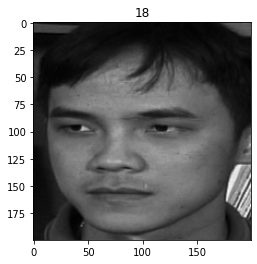

In [23]:
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeitos_teste[0])

# Aula 4 - Classificadores
## 4.1 - Classificador Eigenfaces

Primeiro vamos tranformas os arrays de sujeito em np 32 bits

In [24]:
# import numpy as np

In [25]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [29]:
modelo_eigenfaces = cv2.face.EigenFaceRecognizer_create()

In [31]:
modelo_eigenfaces.train(dados_treinamento, sujeitos)

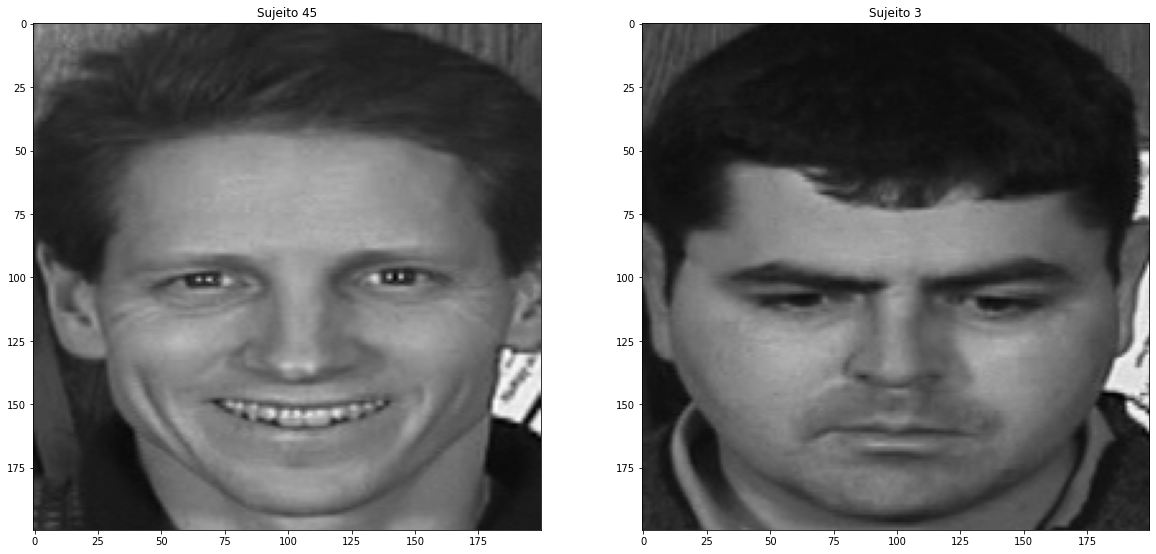

In [34]:
plt.figure(figsize=(20,20))

plt.subplot(121)
plt.title('Sujeito ' + str(sujeitos_teste[6]))
plt.imshow(dados_teste[6], cmap="gray")

plt.subplot(122)
plt.title('Sujeito ' + str(sujeitos_teste[7]))
plt.imshow(dados_teste[7], cmap="gray")

plt.show()

In [35]:
predicao = modelo_eigenfaces.predict(dados_teste[6])
predicao

(45, 4687.287963395324)

In [36]:
predicao = modelo_eigenfaces.predict(dados_teste[7])
predicao

(3, 3315.8154996786197)

## 4.2 - Classificador FisherFaces

In [37]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [44]:
modelo_fisherfaces.train(dados_treinamento, sujeitos)

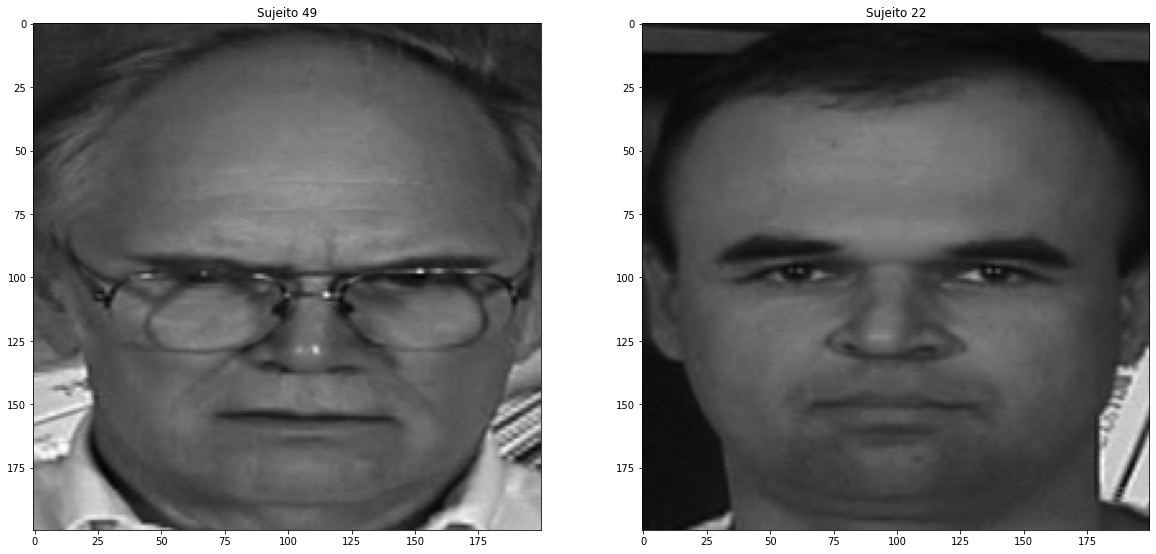

In [48]:
plt.figure(figsize=(20,20))

plt.subplot(121)
plt.title('Sujeito ' + str(sujeitos_teste[2]))
plt.imshow(dados_teste[2], cmap="gray")

plt.subplot(122)
plt.title('Sujeito ' + str(sujeitos_teste[9]))
plt.imshow(dados_teste[9], cmap="gray")

plt.show()

In [49]:
predicao = modelo_fisherfaces.predict(dados_teste[2])
predicao

(49, 1023.749561433333)

In [50]:
predicao = modelo_fisherfaces.predict(dados_teste[9])
predicao

(22, 689.4314228244053)

## 4.3 - Classificador LBPH

tem alterações de filtro durante a construção.

In [51]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [52]:
modelo_lbph.train(dados_treinamento, sujeitos)

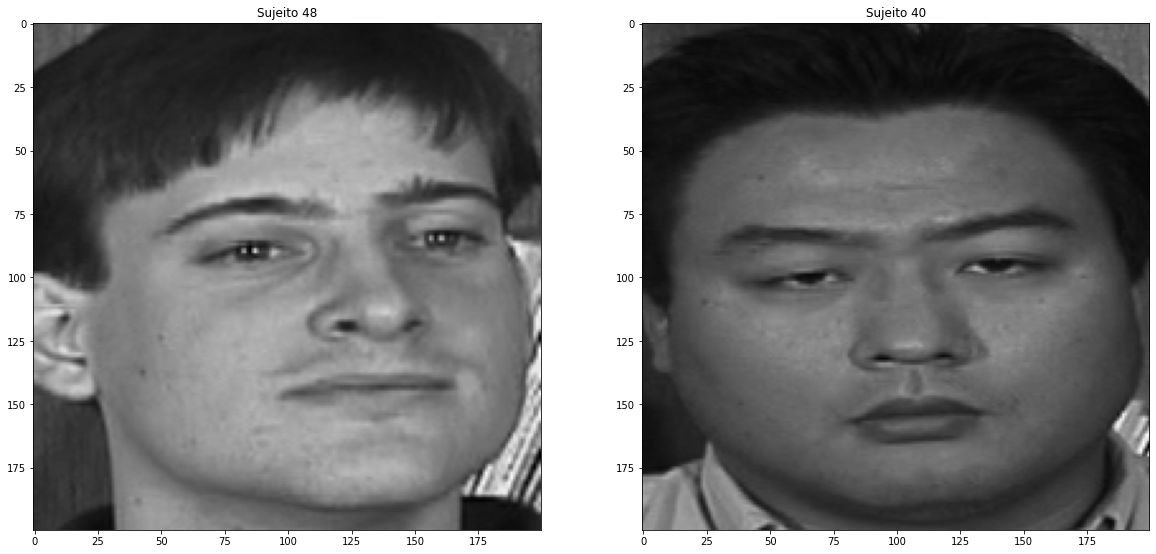

In [53]:
plt.figure(figsize=(20,20))

plt.subplot(121)
plt.title('Sujeito ' + str(sujeitos_teste[30]))
plt.imshow(dados_teste[30], cmap="gray")

plt.subplot(122)
plt.title('Sujeito ' + str(sujeitos_teste[45]))
plt.imshow(dados_teste[45], cmap="gray")

plt.show()

In [54]:
predicao = modelo_lbph.predict(dados_teste[30])
predicao

(48, 33.7456986920254)

In [55]:
predicao = modelo_lbph.predict(dados_teste[45])
predicao

(40, 30.29761593733514)

### Contabilizar acurácia

In [59]:
y_pred_eigenfaces = []

In [60]:
for item in dados_teste:
    y_pred_eigenfaces.append(modelo_eigenfaces.predict(item)[0])

In [62]:
acuracia_eigenfaces = accuracy_score(sujeitos_teste, y_pred_eigenfaces)
acuracia_eigenfaces

0.724

In [63]:
y_pred_fisherfaces = []

In [64]:
for item in dados_teste:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])

In [65]:
acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)
acuracia_fisherfaces

0.52

In [66]:
y_pred_lbph = []

In [67]:
for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])

In [68]:
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)
acuracia_lbph

0.792